# Projektna naloga
## Onesnaženost zraka v Sloveniji

In [40]:
from pandas.compat import StringIO
import numpy as np
import pandas as pd
    
np.set_printoptions(suppress=True)

dataframe = pd.read_csv('podatki/pm10_2019.csv', encoding='utf-8')

In [41]:
data = dataframe.values
copy = data
copy[:, 0] = pd.to_datetime(copy[:, 0], format='%d.%m.%Y').strftime('%m-%Y')

In [42]:
months, counts = np.unique(copy[:, 0], return_counts = True)

In [43]:
# počistimo prazne celice
means = []
for month in months:
    pm10 = data[data[:, 0] == month, 1:20]
    pm10 = pm10[pm10[:, :] != '-'].astype('float') 
    month_mean = np.mean(pm10)
    means.append(month_mean)
    
means = np.column_stack((months, means))
means

array([['01-2019', 33.115315315315314],
       ['02-2019', 36.41634980988593],
       ['03-2019', 22.003424657534246],
       ['04-2019', 23.426807760141095],
       ['05-2019', 11.255434782608695],
       ['06-2019', 20.13978494623656],
       ['07-2019', 14.994791666666666],
       ['08-2019', 16.23076923076923],
       ['09-2019', 13.874113475177305],
       ['10-2019', 19.340314136125656]], dtype=object)

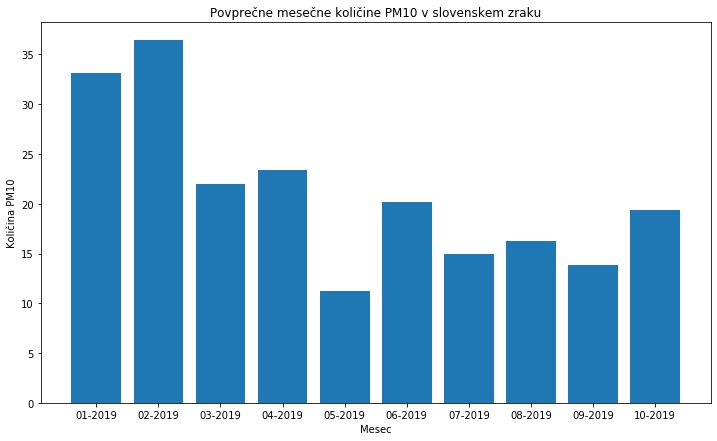

In [44]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.bar(means[:, 0], means[:, 1])
x = plt.xlabel('Mesec')
x = plt.ylabel('Količina PM10')
x = plt.title('Povprečne mesečne količine PM10 v slovenskem zraku')
plt.show()

In [53]:
cities = dataframe.head().columns[1:20].values
city_means = []
for city in range(len(cities)):
    city_data = dataframe[cities[city]].values
    city_data = city_data[city_data[:] != '-'].astype('float') 
    city_means.append(np.mean(city_data))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [54]:
city_means = np.column_stack((cities, city_means))
city_means

array([['LJ_Bežigrad', 20.803986710963454],
       ['LJ_ BF', 18.910299003322258],
       ['LJ_GR', 23.474916387959865],
       ['Maribor', 22.28813559322034],
       ['Zagorje', 24.63545150501672],
       ['Hrastnik', 19.393333333333334],
       ['Trbovlje', 21.33818181818182],
       ['Novo_mesto', 20.8125],
       ['Kranj', 19.292929292929294],
       ['M.Sobota', 20.776271186440677],
       ['Iskrba', 11.85430463576159],
       ['Žerjav', 19.31081081081081],
       ['Celje', 25.285211267605632],
       ['N.Gorica', 20.38487972508591],
       ['Velenje', 17.210169491525424],
       ['Koper', 17.19463087248322],
       ['NG_Grčna', 22.74917491749175],
       ['CE_Mar.', 27.644736842105264],
       ['MS_Cank.', 24.79734219269103]], dtype=object)

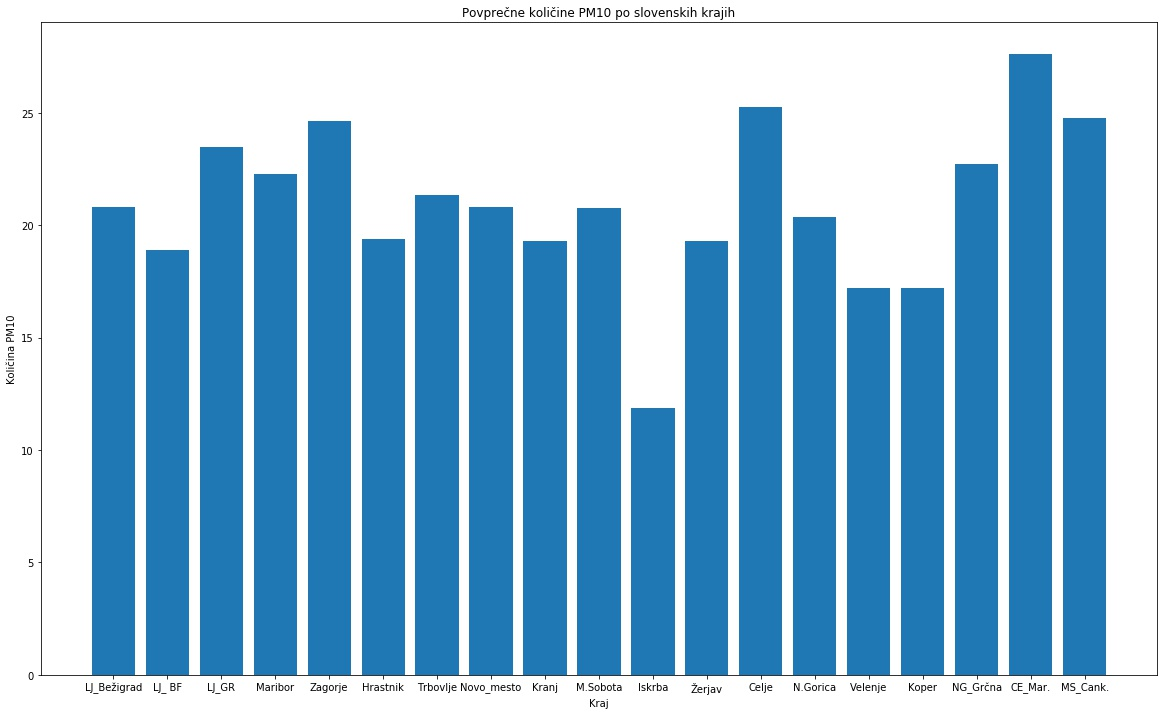

In [56]:
plt.figure(figsize=(20, 12))
plt.bar(city_means[:, 0], city_means[:, 1])
x = plt.xlabel('Kraj')
x = plt.ylabel('Količina PM10')
x = plt.title('Povprečne količine PM10 po slovenskih krajih')
plt.show()